## Stochastic Gradient Descnt
#### 장점
- 효율성
- 쉽게 실행가능함

#### 단점
- SGD는 정규화 매개변수 같은 요소들을 필요로 함
- SGD는 특징 추출에 민감함

### 1.5.1 Classification
### 개념

In [2]:
from sklearn.linear_model import SGDClassifier
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [3]:
clf.predict([[2, 2]])

array([1])

In [4]:
clf.coef_

array([[9.91080278, 9.91080278]])

In [5]:
clf.intercept_

array([-9.97004991])

In [6]:
clf.decision_function([[2, 2]])

array([29.67316119])

In [7]:
clf = SGDClassifier(loss="log", max_iter=5).fit(X, y)
clf.predict_proba([[1, 1]])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[4.97248476e-07, 9.99999503e-01]])

### 예제
- SGD: Maximum margin separating hyperplane

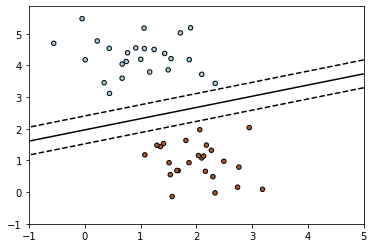

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)
clf.fit(X, y)

xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

plt.axis('tight')
plt.show()

### 1.5.2 Regression

### 개념

In [11]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

### 예제
- SGD: Penalties

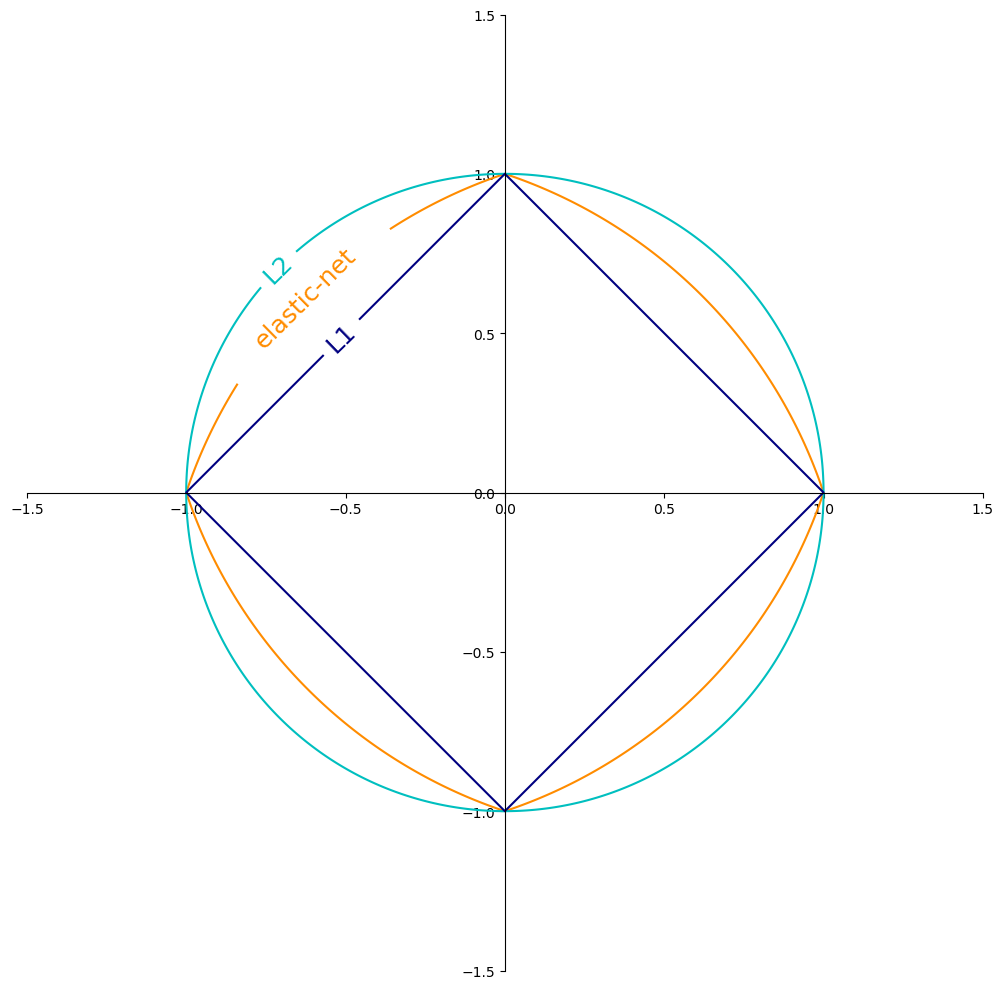

In [13]:
import numpy as np
import matplotlib.pyplot as plt

l1_color = "navy"
l2_color = "c"
elastic_net_color = "darkorange"

line = np.linspace(-1.5, 1.5, 1001)
xx, yy = np.meshgrid(line, line)

l2 = xx**2 + yy**2
l1 = np.abs(xx) + np.abs(yy)
rho = 0.5
elastic_net = rho * l1 + (1 - rho) * l2

plt.figure(figsize=(10, 10), dpi=100)
ax = plt.gca()

elastic_net_contour = plt.contour(xx, yy, elastic_net, levels=[1],
                                 colors=elastic_net_color)
l2_contour = plt.contour(xx, yy, l2, levels=[1], colors=l2_color)
l1_contour = plt.contour(xx, yy, l1, levels=[1], colors=l1_color)
ax.set_aspect("equal")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

plt.clabel(elastic_net_contour, inline=1, fontsize=18,
          fmt={1.0: 'elastic-net'}, manual=[(-1, 1)])
plt.clabel(l2_contour, inline=1, fontsize=18,
          fmt={1.0: 'L2'}, manual=[(-1, 1)])
plt.clabel(l1_contour, inline=1, fontsize=18,
          fmt={1.0: 'L1'}, manual=[(-1, 1)])

plt.tight_layout()
plt.show()